The goal of this notebook is to compute the z-score and the chi2 for each subject and then plot the histogram

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [21]:
Embeddings_UKB= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/Embeddings.csv")
Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/hcp/Embeddings.csv")
Embeddings_epilepsy= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/epilepsy_PBS/Embeddings.csv")

In [22]:
Participants_epilepsy=pd.read_csv("/neurospin/dico/data/human/epilepsy_PBS/participants.tsv", sep="\t")

epilepsy_controls= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="controls"]
epilepsy_irm_neg= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_negatives_centrales"]
epilepsy_irm_pos= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_positives_centrales"]

In [23]:
Embeddings_epilepsy  = Embeddings_epilepsy.rename(columns={Embeddings_epilepsy.columns[0]: "Index"})

Embeddings_controls = Embeddings_epilepsy.merge(epilepsy_controls[["Index"]], on="Index", how="inner")
Embeddings_irm_negatives = Embeddings_epilepsy.merge(epilepsy_irm_neg[["Index"]], on="Index", how="inner")
Embeddings_irm_positives = Embeddings_epilepsy.merge(epilepsy_irm_pos[["Index"]], on="Index", how="inner")

In [24]:
scaler = StandardScaler()

scaler.fit(Embeddings_UKB.iloc[:,1:])

Z_score_UKB=scaler.transform(Embeddings_UKB.iloc[:,1:])
Z_score_HCP=scaler.transform(Embeddings_HCP.iloc[:,1:])
Z_score_controls=scaler.transform(Embeddings_controls.iloc[:,1:])
Z_score_irm_negatives=scaler.transform(Embeddings_irm_negatives.iloc[:,1:])
Z_score_irm_positives=scaler.transform(Embeddings_irm_positives.iloc[:,1:])

In [25]:
Z_score_UKB

array([[ 2.82283461e-01, -2.05047645e+00,  6.58668338e-01, ...,
        -7.70947838e-01,  6.23227074e-01,  1.17761134e+00],
       [ 1.41556613e+00, -1.11386253e+00,  1.94827010e+00, ...,
        -1.26870084e+00, -1.66773037e+00, -3.64630332e-01],
       [ 1.89564103e+00,  1.27259614e+00,  2.73145007e-01, ...,
        -7.00546299e-01,  5.77381737e-01, -5.00451094e-01],
       ...,
       [-3.29010287e-01,  7.18156199e-01,  2.93450927e-01, ...,
        -6.32490962e-01, -2.90383053e-01,  5.12643977e-01],
       [ 1.15005730e+00, -1.56199368e+00,  2.51592834e+00, ...,
        -1.84689172e-03,  1.49907518e+00, -1.16417388e+00],
       [-4.44491938e-01, -7.03441612e-01,  3.14221369e+00, ...,
        -6.30702312e-01,  1.04462175e+00, -1.01692410e+00]])

In [26]:
chi2_UKB = np.sum(Z_score_UKB**2, axis=1, keepdims=True)
chi2_HCP = np.sum(Z_score_HCP**2, axis=1, keepdims=True)
chi2_controls = np.sum(Z_score_controls**2, axis=1, keepdims=True)
chi2_irm_negatives = np.sum(Z_score_irm_negatives**2, axis=1, keepdims=True)
chi2_irm_positives = np.sum(Z_score_irm_positives**2, axis=1, keepdims=True)

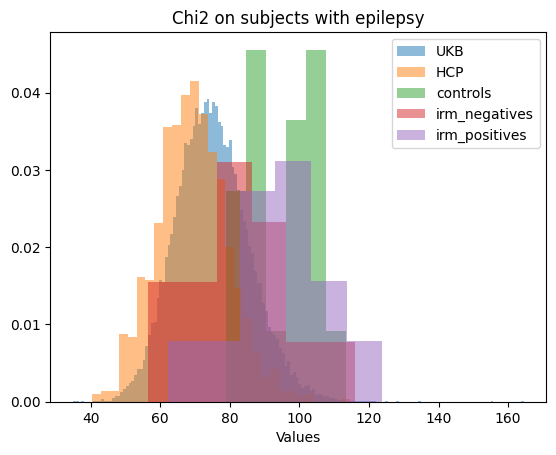

In [27]:
plt.hist(chi2_UKB[:,0], bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(chi2_HCP[:,0], bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(chi2_controls[:,0], bins="auto", alpha=0.5, label="controls", density=True)
plt.hist(chi2_irm_negatives[:,0], bins="auto", alpha=0.5, label="irm_negatives", density=True)
plt.hist(chi2_irm_positives[:,0], bins="auto", alpha=0.5, label="irm_positives", density=True)

plt.xlabel("Values")

plt.title("Chi2 on subjects with epilepsy")
plt.legend()
plt.show()

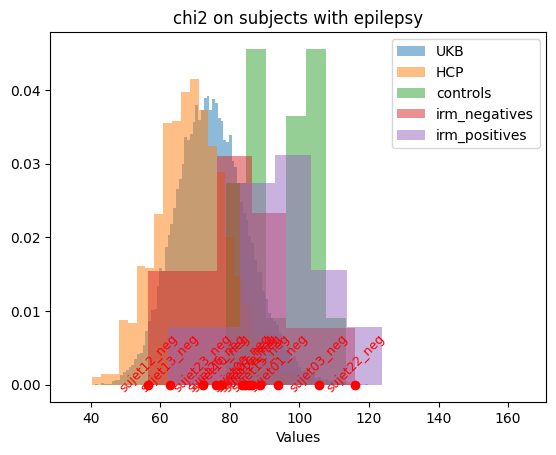

In [28]:
plt.hist(chi2_UKB[:,0], bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(chi2_HCP[:,0], bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(chi2_controls[:,0], bins="auto", alpha=0.5, label="controls", density=True)
plt.hist(chi2_irm_negatives[:,0], bins="auto", alpha=0.5, label="irm_negatives", density=True)
plt.hist(chi2_irm_positives[:,0], bins="auto", alpha=0.5, label="irm_positives", density=True)

#Add index from irm_negatives
y_positions = np.zeros(len(chi2_irm_negatives))  
plt.scatter(chi2_irm_negatives[:,0], y_positions - 0.00002, color="red", zorder=5)

for x, idx in zip(chi2_irm_negatives[:,0], Embeddings_irm_negatives.iloc[:,0]):
    plt.text(x, -0.001, idx, rotation=45, ha="center", fontsize=9, color="red")

plt.xlabel("Values")

plt.title("chi2 on subjects with epilepsy")
plt.legend()
plt.show()